# All Imports


In [2]:
import csv
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical 
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
#import cv2, numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense, LSTM
from keras.regularizers import l2

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
path_to_dataset = '/content/gdrive/Shareddrives/AML Project/Dataset/EEG_data.csv'
df = pd.read_csv(path_to_dataset)

# Explore Dataset

In [ ]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


**sub0 has only the data of subject ID 0**

In [ ]:
sub0 = df[ df['SubjectID'] == 0.0]

**Subject ID and Video ID**

In [ ]:
a = df['VideoID'].unique()
print(sorted(a))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


In [ ]:
a = df['SubjectID'].unique()
print(sorted(a))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]




1.   indivisual_data_list: Contains individual data in a list. indivisual_data_list[0] has the data of subject ID 0.

2.   individual_data_dict: Contains individual data in a dictionary. indivisual_data_dict[0] has the data of subject ID 0.

3.   indivisual_data_len: A list containing the lenght of each individual dataset.


In [ ]:
subject_list = df['SubjectID'].unique()
print(subject_list)

indivisual_data_list = []
indivisual_data_len = []
individual_data_dict = {}

for sub in subject_list:
  indivisual_data = df[ df['SubjectID'] == sub]
  print(sub, ": ", indivisual_data.shape)
  indivisual_data_list.append( indivisual_data )
  indivisual_data_len.append(indivisual_data.shape[0])
  individual_data_dict[sub] = indivisual_data

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
0.0 :  (1261, 15)
1.0 :  (1301, 15)
2.0 :  (1284, 15)
3.0 :  (1314, 15)
4.0 :  (1295, 15)
5.0 :  (1262, 15)
6.0 :  (1275, 15)
7.0 :  (1276, 15)
8.0 :  (1282, 15)
9.0 :  (1261, 15)


a: the data of subject_ID = 0 watching video_ID = 0

In [ ]:
a = df[df['SubjectID'] == 0]
a = a[df['VideoID'] == 0]
a.shape

(144, 15)

# Segmenting the dataset

In [ ]:
X = df.iloc[:, 2:13]

y1 = df.iloc[:, 13]

y2 = df.iloc[:, 14]
y = y2

In [ ]:
X

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0
...,...,...,...,...,...,...,...,...,...,...,...
12806,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0
12807,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0
12808,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0
12809,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0


In [ ]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12806    1.0
12807    1.0
12808    1.0
12809    1.0
12810    1.0
Name: predefinedlabel, Length: 12811, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
5118,34.0,56.0,153.0,293280.0,47160.0,16365.0,8304.0,7563.0,2650.0,1107.0,1023.0
1158,24.0,56.0,3.0,664398.0,353321.0,188482.0,30192.0,20410.0,71854.0,35329.0,28774.0
7086,48.0,47.0,-11.0,90011.0,49840.0,3264.0,3108.0,2449.0,2964.0,1168.0,232.0
6202,23.0,53.0,59.0,467987.0,47405.0,11447.0,11330.0,2916.0,3049.0,1618.0,981.0
1704,20.0,40.0,178.0,864476.0,247878.0,184132.0,34152.0,23979.0,30449.0,17655.0,5344.0
...,...,...,...,...,...,...,...,...,...,...,...
4859,44.0,57.0,42.0,1428504.0,132316.0,39469.0,117500.0,16909.0,21913.0,8110.0,3360.0
3264,75.0,81.0,40.0,9885.0,18621.0,8897.0,9514.0,7726.0,7765.0,2837.0,5737.0
9845,54.0,70.0,92.0,344465.0,93719.0,15694.0,12550.0,7867.0,20314.0,20564.0,4757.0
10799,24.0,57.0,11.0,1250939.0,160032.0,76839.0,26692.0,60179.0,21231.0,8507.0,4919.0


In [ ]:
X_test

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
133,34.0,51.0,8.0,1070340.0,128811.0,54004.0,4362.0,9190.0,31349.0,15836.0,2875.0
3955,23.0,44.0,-1.0,2038119.0,219212.0,86189.0,19246.0,28653.0,39380.0,17866.0,6403.0
6469,90.0,66.0,-260.0,274793.0,49977.0,49586.0,5803.0,6108.0,15983.0,7278.0,1516.0
11220,69.0,30.0,67.0,490384.0,125277.0,8613.0,21362.0,27372.0,23282.0,19399.0,5880.0
343,70.0,40.0,22.0,917135.0,68137.0,11830.0,4362.0,23570.0,67568.0,39001.0,21761.0
...,...,...,...,...,...,...,...,...,...,...,...
12100,40.0,69.0,10.0,384763.0,26226.0,1653.0,4832.0,1630.0,4730.0,7860.0,601.0
10133,54.0,37.0,81.0,809085.0,76608.0,12885.0,6058.0,8510.0,27795.0,9673.0,8357.0
6230,41.0,57.0,25.0,178290.0,53474.0,1796.0,6470.0,2849.0,4750.0,1111.0,665.0
8803,0.0,0.0,-2048.0,1993240.0,176563.0,47009.0,154956.0,167221.0,180396.0,76068.0,52581.0


# Creating Data Sequence

**Version 1:**


features is a dictionary has keys 00 to 99 where first digit represents the subject id and the second digit represents the video id. So, features[xy] contains the data of subject x while watching video y. features[xy].shape[0] = 1344 = 112 x 12 where 12 is the number of features in a sequence and the 112 is the number of sequence.
12 features are: Attention	Mediation	Raw	Delta	Theta	Alpha1	Alpha2	Beta1	Beta2	Gamma1	Gamma2	predefinedlabel

In [ ]:
X = df.iloc[:, 0:14]
y = df.iloc[:, 14]

X = np.asarray(X)
Y = np.asarray(y)
features = {}
output = {}
print(X.shape[0])
counter = 0
for i in range(X.shape[0]):
  # subjectID*10 + VideoID = 1*10 + 1 = 11
  tu = int(X[i][0]*10 + X[i][1])
  if tu not in features.keys():
    counter += 1
    #print(tu)
    
    features[tu] = X[i][2:14] 

  elif features[tu].shape[0]<1344:
    features[tu] = np.concatenate((features[tu],X[i][2:14]),axis =0)
    counter += 1
  #print(tu, features[tu].shape)
  output[tu]= Y[i]


**Converting dictionary to np array for model training**

In [ ]:
input = np.zeros((100,1344),dtype = float)
labels = np.zeros((100,1),dtype = int)

for i in features.keys():
    input[i,:] = features[i]
    labels[i] = output[i]

**Version 2**

features is a dictionary has keys 00 to 99 where first digit represents the subject id and the second digit represents the video id. So, features[xy] contains the data of subject x while watching video y. features[xy].shape[0] = 1232 = 112 x 11 where 11 is the number of features in a sequence and the 112 is the number of sequence. 11 features are: Attention Mediation Raw Delta Theta Alpha1 Alpha2 Beta1 Beta2 Gamma1 Gamma2

In [ ]:
X = df.iloc[:, 0:13]
y = df.iloc[:, 14]

X = np.asarray(X)
Y = np.asarray(y)
features = {}
output = {}
print(X.shape[0])
counter = 0
for i in range(X.shape[0]):
  # subjectID*10 + VideoID = 1*10 + 1 = 11
  tu = int(X[i][0]*10 + X[i][1])
  if tu not in features.keys():
    counter += 1
    #print(tu)
    
    features[tu] = X[i][2:13] 

  elif features[tu].shape[0]<1232:
    features[tu] = np.concatenate((features[tu],X[i][2:13]),axis =0)
    counter += 1
  #print(tu, features[tu].shape)
  output[tu]= Y[i]


12811


In [ ]:
features[99].shape

(1232,)

In [ ]:
print(features.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])


In [ ]:
input = np.zeros((100,1232),dtype = float)
labels = np.zeros((100,1),dtype = int)

for i in features.keys():
    input[i,:] = features[i]
    labels[i] = output[i]

In [ ]:
input.shape

(100, 1232)

In [ ]:
labels.shape

(100, 1)

**MODEL** (Directly from the paper without any modification )

In [ ]:
print( "Begin LSTM model")
accuracy = 0.0
for i in range(0,5):

    X_train, X_test, Y_train, Y_test = train_test_split(input, labels, test_size=0.2, random_state=i*10)
    
    # 100 * 1344 = 100 * 112 * 12
    X_train = X_train.reshape(80,112,12)
    X_test = X_test.reshape(20,112,12)
    
    y_train = np.zeros((80,112),dtype='int')
    y_test = np.zeros((20,112),dtype='int')

    y_train = np.repeat(Y_train,112, axis=1)
    y_test = np.repeat(Y_test,112, axis=1)

    
    np.random.seed(1)
    # create the model
    model = Sequential()
    batch_size = 20
    #model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length, dropout=0.2))
    #model.add(Dropout(0.2))
    model.add(BatchNormalization(input_shape=(112,12),axis=2))
    model.add(LSTM(100, return_sequences=False, input_shape=(112,12)))
    #model.add(Dropout(0.2))
    #model.add(LSTM(200, return_sequences = False, input_length=1024))
    model.add(Dense(112, activation='hard_sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])
    #print(model.summary())
    model.fit(X_train, y_train,epochs=30)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, batch_size = batch_size, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    accuracy += scores[1]
print( accuracy/5)

Begin LSTM model
Epoch 1/30
3/3 [==============================] - 33s 15ms/step - loss: 0.6947 - binary_accuracy: 0.4991
Epoch 2/30
3/3 [==============================] - 0s 13ms/step - loss: 0.6928 - binary_accuracy: 0.5058
Epoch 3/30
3/3 [==============================] - 0s 11ms/step - loss: 0.6886 - binary_accuracy: 0.5451
Epoch 4/30
3/3 [==============================] - 0s 12ms/step - loss: 0.6859 - binary_accuracy: 0.5792
Epoch 5/30
3/3 [==============================] - 0s 12ms/step - loss: 0.6623 - binary_accuracy: 0.6721
Epoch 6/30
3/3 [==============================] - 0s 12ms/step - loss: 0.6785 - binary_accuracy: 0.5693
Epoch 7/30
3/3 [==============================] - 0s 10ms/step - loss: 0.6747 - binary_accuracy: 0.5951
Epoch 8/30
3/3 [==============================] - 0s 10ms/step - loss: 0.6580 - binary_accuracy: 0.6309
Epoch 9/30
3/3 [==============================] - 0s 11ms/step - loss: 0.6733 - binary_accuracy: 0.5929
Epoch 10/30
3/3 [=============================

# Our Model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(input, labels, test_size=0.2, random_state=10)
    
# 100 * 1344 = 100 * 112 * 12
X_train = X_train.reshape(80,112,12)
X_test = X_test.reshape(20,112,12)

y_train = np.zeros((80,112),dtype='int')
y_test = np.zeros((20,112),dtype='int')

y_train = np.repeat(Y_train,112, axis=1)
y_test = np.repeat(Y_test,112, axis=1)


In [ ]:

batch_size = 20

np.random.seed(1)

model = Sequential()


model.add(BatchNormalization(input_shape=(112,12),axis=2))
model.add(LSTM(100, return_sequences=True, input_shape=(112,12)))
model.add(LSTM(50, activation='relu'))

model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
3/3 [==============================] - 3s 191ms/step - loss: 0.6935 - binary_accuracy: 0.4964
Epoch 2/10
3/3 [==============================] - 1s 170ms/step - loss: 0.6921 - binary_accuracy: 0.5243
Epoch 3/10
3/3 [==============================] - 1s 172ms/step - loss: 0.6883 - binary_accuracy: 0.5595
Epoch 4/10
3/3 [==============================] - 1s 189ms/step - loss: 2.2578 - binary_accuracy: 0.5554
Epoch 5/10
3/3 [==============================] - 1s 169ms/step - loss: 2.4194 - binary_accuracy: 0.5740
Epoch 6/10
3/3 [==============================] - 1s 169ms/step - loss: 2.7343 - binary_accuracy: 0.5690
Epoch 7/10
3/3 [==============================] - 0s 170ms/step - loss: 2.5829 - binary_accuracy: 0.5730
Epoch 8/10
3/3 [==============================] - 1s 174ms/step - loss: 2.4031 - binary_accuracy: 0.5915
Epoch 9/10
3/3 [==============================] - 1s 176ms/step - loss: 2.7295 - binary_accuracy: 0.5818
Epoch 10/10
3/3 [==============================] - 0s 1

In [ ]:

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)
scores

1/1 [==============================] - 0s 486ms/step - loss: 3.9453 - binary_accuracy: 0.5750


[3.9453396797180176, 0.574999988079071]

**Train Model with dataset version 2**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(input, labels, test_size=0.2, random_state=10)
    
# 100 * 1232 = 100 * 112 * 11
X_train = X_train.reshape(80,112,11)
X_test = X_test.reshape(20,112,11)

y_train = np.zeros((80,112),dtype='int')
y_test = np.zeros((20,112),dtype='int')

y_train = np.repeat(Y_train,112, axis=1)
y_test = np.repeat(Y_test,112, axis=1)

In [ ]:
Y_train[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [ ]:
y_train[:10]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:

batch_size = 50

np.random.seed(1)

model = Sequential()

model.add(LSTM(100, return_sequences=True, input_shape=(112,11)))
model.add(LSTM(50, return_sequences=True,activation='relu'))
model.add(LSTM(50, return_sequences=True,activation='relu'))
model.add(Dense(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 35s 293ms/step - loss: 0.6919 - binary_accuracy: 0.5604
Epoch 2/30
3/3 [==============================] - 1s 282ms/step - loss: 0.9326 - binary_accuracy: 0.5018
Epoch 3/30
3/3 [==============================] - 1s 289ms/step - loss: 0.6635 - binary_accuracy: 0.6268
Epoch 4/30
3/3 [==============================] - 1s 279ms/step - loss: 0.6591 - binary_accuracy: 0.6270
Epoch 5/30
3/3 [==============================] - 1s 279ms/step - loss: 0.6397 - binary_accuracy: 0.6556
Epoch 6/30
3/3 [==============================] - 1s 317ms/step - loss: 0.6363 - binary_accuracy: 0.6358
Epoch 7/30
3/3 [==============================] - 1s 298ms/step - loss: 0.6656 - binary_accuracy: 0.6409
Epoch 8/30
3/3 [==============================] - 1s 284ms/step - loss: 0.6510 - binary_accuracy: 0.6161
Epoch 9/30
3/3 [==============================] - 1s 329ms/step - loss: 0.6283 - binary_accuracy: 0.6775
Epoch 10/30
3/3 [==============================] - 1s 

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)
scores

1/1 [==============================] - 1s 639ms/step - loss: 1.3449 - binary_accuracy: 0.6196


[1.3448717594146729, 0.6196428537368774]

# **MODEL 1**

In [ ]:
from keras.layers.wrappers import Bidirectional

model = Sequential()
batch_size = 20

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(50, return_sequences=False, input_shape=(112,12)),merge_mode = 'ave'))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])

model.fit(X_train, y_train,epochs=25)

Epoch 1/25
3/3 [==============================] - 4s 75ms/step - loss: 0.6942 - binary_accuracy: 0.4946
Epoch 2/25
3/3 [==============================] - 0s 72ms/step - loss: 0.6918 - binary_accuracy: 0.5300
Epoch 3/25
3/3 [==============================] - 0s 73ms/step - loss: 0.6889 - binary_accuracy: 0.5659
Epoch 4/25
3/3 [==============================] - 0s 71ms/step - loss: 0.6849 - binary_accuracy: 0.5947
Epoch 5/25
3/3 [==============================] - 0s 74ms/step - loss: 0.6746 - binary_accuracy: 0.6473
Epoch 6/25
3/3 [==============================] - 0s 74ms/step - loss: 0.6578 - binary_accuracy: 0.6899
Epoch 7/25
3/3 [==============================] - 0s 75ms/step - loss: 0.6439 - binary_accuracy: 0.7361
Epoch 8/25
3/3 [==============================] - 0s 74ms/step - loss: 0.6264 - binary_accuracy: 0.7402
Epoch 9/25
3/3 [==============================] - 0s 72ms/step - loss: 0.6204 - binary_accuracy: 0.7533
Epoch 10/25
3/3 [==============================] - 0s 88ms/step 

In [ ]:
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

1/1 [==============================] - 0s 29ms/step - loss: 0.5500 - binary_accuracy: 0.7045


[0.5500414967536926, 0.704464316368103]

In [ ]:
model = Sequential()
batch_size = 20

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(50, return_sequences=False, input_shape=(112,12)),merge_mode = 'ave'))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])

model.fit(X_train, y_train,epochs=50)

model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/50
3/3 [==============================] - 4s 81ms/step - loss: 0.6932 - binary_accuracy: 0.5070
Epoch 2/50
3/3 [==============================] - 0s 78ms/step - loss: 0.6902 - binary_accuracy: 0.5420
Epoch 3/50
3/3 [==============================] - 0s 73ms/step - loss: 0.6861 - binary_accuracy: 0.5851
Epoch 4/50
3/3 [==============================] - 0s 77ms/step - loss: 0.6758 - binary_accuracy: 0.6351
Epoch 5/50
3/3 [==============================] - 0s 92ms/step - loss: 0.6642 - binary_accuracy: 0.6731
Epoch 6/50
3/3 [==============================] - 0s 74ms/step - loss: 0.6393 - binary_accuracy: 0.7442
Epoch 7/50
3/3 [==============================] - 0s 72ms/step - loss: 0.6595 - binary_accuracy: 0.6345
Epoch 8/50
3/3 [==============================] - 0s 82ms/step - loss: 0.6225 - binary_accuracy: 0.7142
Epoch 9/50
3/3 [==============================] - 0s 73ms/step - loss: 0.6102 - binary_accuracy: 0.7536
Epoch 10/50
3/3 [==============================] - 0s 76ms/step 

[0.6909494996070862, 0.5741071701049805]

# MODEL 2

In [ ]:
from keras.layers.wrappers import Bidirectional

model = Sequential()
batch_size = 20

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(200, return_sequences=False, input_shape=(112,11)),merge_mode = 'ave'))
model.add(Dropout(0.3))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])
h = model.fit(X_train, y_train,epochs=25)

Epoch 1/25
3/3 [==============================] - 5s 372ms/step - loss: 0.6929 - binary_accuracy: 0.5118
Epoch 2/25
3/3 [==============================] - 1s 394ms/step - loss: 0.6742 - binary_accuracy: 0.6210
Epoch 3/25
3/3 [==============================] - 1s 378ms/step - loss: 0.6672 - binary_accuracy: 0.6043
Epoch 4/25
3/3 [==============================] - 1s 380ms/step - loss: 0.6104 - binary_accuracy: 0.6809
Epoch 5/25
3/3 [==============================] - 1s 371ms/step - loss: 0.6213 - binary_accuracy: 0.6764
Epoch 6/25
3/3 [==============================] - 1s 360ms/step - loss: 0.6287 - binary_accuracy: 0.6622
Epoch 7/25
3/3 [==============================] - 1s 374ms/step - loss: 0.5991 - binary_accuracy: 0.6835
Epoch 8/25
3/3 [==============================] - 1s 371ms/step - loss: 0.6107 - binary_accuracy: 0.6524
Epoch 9/25
3/3 [==============================] - 1s 371ms/step - loss: 0.5828 - binary_accuracy: 0.7051
Epoch 10/25
3/3 [==============================] - 1s 3

In [ ]:
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

1/1 [==============================] - 1s 1s/step - loss: 0.5809 - binary_accuracy: 0.6009


[0.5808601379394531, 0.6008929014205933]

In [ ]:
model = Sequential()
batch_size = 10

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(200, return_sequences=False),merge_mode = 'ave'))
model.add(Dropout(0.3))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])
h = model.fit(X_train, y_train,epochs=25)
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/25
3/3 [==============================] - 5s 379ms/step - loss: 0.6938 - binary_accuracy: 0.5073
Epoch 2/25
3/3 [==============================] - 1s 385ms/step - loss: 0.6806 - binary_accuracy: 0.5995
Epoch 3/25
3/3 [==============================] - 1s 371ms/step - loss: 0.6480 - binary_accuracy: 0.6345
Epoch 4/25
3/3 [==============================] - 1s 374ms/step - loss: 0.6315 - binary_accuracy: 0.6424
Epoch 5/25
3/3 [==============================] - 1s 394ms/step - loss: 0.6461 - binary_accuracy: 0.6370
Epoch 6/25
3/3 [==============================] - 1s 368ms/step - loss: 0.6241 - binary_accuracy: 0.6600
Epoch 7/25
3/3 [==============================] - 1s 374ms/step - loss: 0.6224 - binary_accuracy: 0.6872
Epoch 8/25
3/3 [==============================] - 1s 367ms/step - loss: 0.6147 - binary_accuracy: 0.6740
Epoch 9/25
3/3 [==============================] - 1s 369ms/step - loss: 0.6162 - binary_accuracy: 0.6703
Epoch 10/25
3/3 [==============================] - 1s 3

[0.6270943880081177, 0.75]

In [ ]:
model = Sequential()
batch_size = 10

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(200, return_sequences=False),merge_mode = 'ave'))
model.add(Dropout(0.3))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])
h = model.fit(X_train, y_train,epochs=30)
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/30
3/3 [==============================] - 6s 385ms/step - loss: 0.6942 - binary_accuracy: 0.4930
Epoch 2/30
3/3 [==============================] - 1s 376ms/step - loss: 0.6848 - binary_accuracy: 0.5854
Epoch 3/30
3/3 [==============================] - 1s 382ms/step - loss: 0.6535 - binary_accuracy: 0.6138
Epoch 4/30
3/3 [==============================] - 1s 397ms/step - loss: 0.6422 - binary_accuracy: 0.6570
Epoch 5/30
3/3 [==============================] - 1s 380ms/step - loss: 0.6288 - binary_accuracy: 0.6396
Epoch 6/30
3/3 [==============================] - 1s 383ms/step - loss: 0.6240 - binary_accuracy: 0.6280
Epoch 7/30
3/3 [==============================] - 1s 383ms/step - loss: 0.6112 - binary_accuracy: 0.6723
Epoch 8/30
3/3 [==============================] - 1s 374ms/step - loss: 0.6416 - binary_accuracy: 0.6200
Epoch 9/30
3/3 [==============================] - 1s 377ms/step - loss: 0.6017 - binary_accuracy: 0.6932
Epoch 10/30
3/3 [==============================] - 1s 3

[0.6047989130020142, 0.7424107789993286]

In [ ]:
model = Sequential()
batch_size = 10

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(200, return_sequences=False),merge_mode = 'ave'))
model.add(Dropout(0.3))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['binary_accuracy'])
h = model.fit(X_train, y_train,epochs=30)
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/30
3/3 [==============================] - 5s 394ms/step - loss: 0.6935 - binary_accuracy: 0.5009
Epoch 2/30
3/3 [==============================] - 1s 368ms/step - loss: 0.6890 - binary_accuracy: 0.5647
Epoch 3/30
3/3 [==============================] - 1s 375ms/step - loss: 0.6852 - binary_accuracy: 0.5845
Epoch 4/30
3/3 [==============================] - 1s 395ms/step - loss: 0.6652 - binary_accuracy: 0.6496
Epoch 5/30
3/3 [==============================] - 1s 365ms/step - loss: 0.6240 - binary_accuracy: 0.6970
Epoch 6/30
3/3 [==============================] - 1s 394ms/step - loss: 0.6022 - binary_accuracy: 0.7228
Epoch 7/30
3/3 [==============================] - 1s 388ms/step - loss: 0.6272 - binary_accuracy: 0.6674
Epoch 8/30
3/3 [==============================] - 1s 366ms/step - loss: 0.6131 - binary_accuracy: 0.6877
Epoch 9/30
3/3 [==============================] - 1s 419ms/step - loss: 0.5769 - binary_accuracy: 0.7141
Epoch 10/30
3/3 [==============================] - 1s 3

[0.5878952741622925, 0.6982142925262451]

In [ ]:
model = Sequential()
batch_size = 10

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(200, return_sequences=False),merge_mode = 'ave'))
model.add(Dropout(0.4))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])
h = model.fit(X_train, y_train,epochs=30)
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/30
3/3 [==============================] - 6s 391ms/step - loss: 0.6933 - binary_accuracy: 0.5153
Epoch 2/30
3/3 [==============================] - 1s 408ms/step - loss: 0.6745 - binary_accuracy: 0.6184
Epoch 3/30
3/3 [==============================] - 1s 388ms/step - loss: 0.6619 - binary_accuracy: 0.6465
Epoch 4/30
3/3 [==============================] - 1s 376ms/step - loss: 0.6511 - binary_accuracy: 0.6420
Epoch 5/30
3/3 [==============================] - 1s 388ms/step - loss: 0.5956 - binary_accuracy: 0.7125
Epoch 6/30
3/3 [==============================] - 1s 388ms/step - loss: 0.5947 - binary_accuracy: 0.6986
Epoch 7/30
3/3 [==============================] - 1s 389ms/step - loss: 0.5755 - binary_accuracy: 0.7090
Epoch 8/30
3/3 [==============================] - 1s 391ms/step - loss: 0.5979 - binary_accuracy: 0.7022
Epoch 9/30
3/3 [==============================] - 1s 379ms/step - loss: 0.6464 - binary_accuracy: 0.6612
Epoch 10/30
3/3 [==============================] - 1s 3

[0.5237225890159607, 0.753125011920929]

In [ ]:
model = Sequential()
batch_size = 10

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(200, return_sequences=False),merge_mode = 'ave'))
model.add(Dropout(0.4))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])
h = model.fit(X_train, y_train,epochs=40)
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/40
3/3 [==============================] - 5s 404ms/step - loss: 0.6928 - binary_accuracy: 0.5202
Epoch 2/40
3/3 [==============================] - 1s 407ms/step - loss: 0.6742 - binary_accuracy: 0.6094
Epoch 3/40
3/3 [==============================] - 1s 379ms/step - loss: 0.6795 - binary_accuracy: 0.5915
Epoch 4/40
3/3 [==============================] - 1s 386ms/step - loss: 0.6426 - binary_accuracy: 0.6719
Epoch 5/40
3/3 [==============================] - 1s 388ms/step - loss: 0.6087 - binary_accuracy: 0.7095
Epoch 6/40
3/3 [==============================] - 1s 410ms/step - loss: 0.6484 - binary_accuracy: 0.6510
Epoch 7/40
3/3 [==============================] - 1s 395ms/step - loss: 0.5943 - binary_accuracy: 0.7552
Epoch 8/40
3/3 [==============================] - 1s 387ms/step - loss: 0.5879 - binary_accuracy: 0.7682
Epoch 9/40
3/3 [==============================] - 1s 379ms/step - loss: 0.6376 - binary_accuracy: 0.7131
Epoch 10/40
3/3 [==============================] - 1s 4

[0.8051750063896179, 0.6700893044471741]

In [ ]:
model = Sequential()
batch_size = 10

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(200, return_sequences=False),merge_mode = 'ave'))
model.add(Dropout(0.4))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])
h = model.fit(X_train, y_train,epochs=30)
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/30
3/3 [==============================] - 5s 407ms/step - loss: 0.6936 - binary_accuracy: 0.5074
Epoch 2/30
3/3 [==============================] - 1s 392ms/step - loss: 0.6852 - binary_accuracy: 0.5634
Epoch 3/30
3/3 [==============================] - 1s 389ms/step - loss: 0.6682 - binary_accuracy: 0.6029
Epoch 4/30
3/3 [==============================] - 1s 378ms/step - loss: 0.6259 - binary_accuracy: 0.6570
Epoch 5/30
3/3 [==============================] - 1s 371ms/step - loss: 0.6419 - binary_accuracy: 0.6471
Epoch 6/30
3/3 [==============================] - 1s 399ms/step - loss: 0.6236 - binary_accuracy: 0.6719
Epoch 7/30
3/3 [==============================] - 1s 391ms/step - loss: 0.6041 - binary_accuracy: 0.6799
Epoch 8/30
3/3 [==============================] - 1s 402ms/step - loss: 0.5979 - binary_accuracy: 0.6770
Epoch 9/30
3/3 [==============================] - 1s 389ms/step - loss: 0.6682 - binary_accuracy: 0.5797
Epoch 10/30
3/3 [==============================] - 1s 4

[0.5563085079193115, 0.7861607670783997]

In [ ]:
model = Sequential()
batch_size = 1000

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(200, return_sequences=False),merge_mode = 'ave'))
model.add(Dropout(0.35))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])
h = model.fit(X_train, y_train,epochs=30)
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/30
3/3 [==============================] - 5s 392ms/step - loss: 0.6920 - binary_accuracy: 0.5180
Epoch 2/30
3/3 [==============================] - 1s 396ms/step - loss: 0.6605 - binary_accuracy: 0.6535
Epoch 3/30
3/3 [==============================] - 1s 375ms/step - loss: 0.6555 - binary_accuracy: 0.6242
Epoch 4/30
3/3 [==============================] - 1s 369ms/step - loss: 0.6417 - binary_accuracy: 0.6341
Epoch 5/30
3/3 [==============================] - 1s 388ms/step - loss: 0.5796 - binary_accuracy: 0.7204
Epoch 6/30
3/3 [==============================] - 1s 384ms/step - loss: 0.6264 - binary_accuracy: 0.6865
Epoch 7/30
3/3 [==============================] - 1s 372ms/step - loss: 0.5940 - binary_accuracy: 0.7136
Epoch 8/30
3/3 [==============================] - 1s 360ms/step - loss: 0.6018 - binary_accuracy: 0.7087
Epoch 9/30
3/3 [==============================] - 1s 364ms/step - loss: 0.5642 - binary_accuracy: 0.7319
Epoch 10/30
3/3 [==============================] - 1s 3

[0.5819692611694336, 0.7160714268684387]

In [ ]:
model = Sequential()
batch_size = 100

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(200, return_sequences=False),merge_mode = 'ave'))
model.add(Dropout(0.35))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])
h = model.fit(X_train, y_train,epochs=30)
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/30
3/3 [==============================] - 5s 362ms/step - loss: 0.6930 - binary_accuracy: 0.5077
Epoch 2/30
3/3 [==============================] - 1s 385ms/step - loss: 0.6726 - binary_accuracy: 0.6145
Epoch 3/30
3/3 [==============================] - 1s 393ms/step - loss: 0.6475 - binary_accuracy: 0.6987
Epoch 4/30
3/3 [==============================] - 1s 392ms/step - loss: 0.6275 - binary_accuracy: 0.6822
Epoch 5/30
3/3 [==============================] - 1s 384ms/step - loss: 0.6390 - binary_accuracy: 0.6773
Epoch 6/30
3/3 [==============================] - 1s 379ms/step - loss: 0.6273 - binary_accuracy: 0.6633
Epoch 7/30
3/3 [==============================] - 1s 378ms/step - loss: 0.6450 - binary_accuracy: 0.6731
Epoch 8/30
3/3 [==============================] - 1s 396ms/step - loss: 0.6155 - binary_accuracy: 0.7123
Epoch 9/30
3/3 [==============================] - 1s 379ms/step - loss: 0.5945 - binary_accuracy: 0.6883
Epoch 10/30
3/3 [==============================] - 1s 3

[0.5756834745407104, 0.699999988079071]

In [ ]:
model = Sequential()
batch_size = 10

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(200, return_sequences=False),merge_mode = 'ave'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])
h = model.fit(X_train, y_train,epochs=50)
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/50
3/3 [==============================] - 5s 393ms/step - loss: 1.0574 - binary_accuracy: 0.5027
Epoch 2/50
3/3 [==============================] - 1s 388ms/step - loss: 0.9864 - binary_accuracy: 0.5102
Epoch 3/50
3/3 [==============================] - 1s 381ms/step - loss: 0.9162 - binary_accuracy: 0.5425
Epoch 4/50
3/3 [==============================] - 1s 391ms/step - loss: 0.8458 - binary_accuracy: 0.5407
Epoch 5/50
3/3 [==============================] - 1s 397ms/step - loss: 0.8568 - binary_accuracy: 0.5412
Epoch 6/50
3/3 [==============================] - 1s 384ms/step - loss: 0.8681 - binary_accuracy: 0.5764
Epoch 7/50
3/3 [==============================] - 1s 380ms/step - loss: 0.8683 - binary_accuracy: 0.5533
Epoch 8/50
3/3 [==============================] - 1s 389ms/step - loss: 0.8371 - binary_accuracy: 0.5896
Epoch 9/50
3/3 [==============================] - 1s 401ms/step - loss: 0.8404 - binary_accuracy: 0.5977
Epoch 10/50
3/3 [==============================] - 1s 3

[0.6274021863937378, 0.6379464268684387]

In [ ]:
model = Sequential()
batch_size = 5

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(200, return_sequences=False),merge_mode = 'ave'))
model.add(Dropout(0.3))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])
h = model.fit(X_train, y_train,epochs=30)
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/30
3/3 [==============================] - 5s 397ms/step - loss: 0.6924 - binary_accuracy: 0.5250
Epoch 2/30
3/3 [==============================] - 1s 386ms/step - loss: 0.6762 - binary_accuracy: 0.6125
Epoch 3/30
3/3 [==============================] - 1s 394ms/step - loss: 0.6552 - binary_accuracy: 0.6263
Epoch 4/30
3/3 [==============================] - 1s 397ms/step - loss: 0.6285 - binary_accuracy: 0.7159
Epoch 5/30
3/3 [==============================] - 1s 401ms/step - loss: 0.6074 - binary_accuracy: 0.7357
Epoch 6/30
3/3 [==============================] - 1s 380ms/step - loss: 0.6938 - binary_accuracy: 0.5752
Epoch 7/30
3/3 [==============================] - 1s 386ms/step - loss: 0.6317 - binary_accuracy: 0.6924
Epoch 8/30
3/3 [==============================] - 1s 379ms/step - loss: 0.6199 - binary_accuracy: 0.6936
Epoch 9/30
3/3 [==============================] - 1s 392ms/step - loss: 0.5969 - binary_accuracy: 0.7087
Epoch 10/30
3/3 [==============================] - 1s 3

[0.5935676097869873, 0.699999988079071]

# MODEL 2.5

In [ ]:
model = Sequential()
batch_size = 10

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(500, return_sequences=False),merge_mode = 'ave'))
model.add(Dropout(0.5))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])
h = model.fit(X_train, y_train,epochs=30)
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/30
3/3 [==============================] - 9s 2s/step - loss: 0.6943 - binary_accuracy: 0.4964
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 0.6748 - binary_accuracy: 0.6431
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 0.7037 - binary_accuracy: 0.5091
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 0.6406 - binary_accuracy: 0.6430
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 0.7133 - binary_accuracy: 0.5602
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 0.6408 - binary_accuracy: 0.6611
Epoch 7/30
3/3 [==============================] - 5s 2s/step - loss: 0.6867 - binary_accuracy: 0.5587
Epoch 8/30
3/3 [==============================] - 5s 2s/step - loss: 0.7029 - binary_accuracy: 0.5271
Epoch 9/30
3/3 [==============================] - 5s 2s/step - loss: 0.6944 - binary_accuracy: 0.5418
Epoch 10/30
3/3 [==============================] - 5s 2s/step - loss: 0.7018 - bin

[0.6524382829666138, 0.6428571939468384]

# MODEL 2.6

In [ ]:
model = Sequential()
batch_size = 10

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(500, return_sequences=False),merge_mode = 'ave'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])
h = model.fit(X_train, y_train,epochs=100)
model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/100
3/3 [==============================] - 9s 2s/step - loss: 0.6941 - binary_accuracy: 0.4989
Epoch 2/100
3/3 [==============================] - 5s 2s/step - loss: 0.7813 - binary_accuracy: 0.5972
Epoch 3/100
3/3 [==============================] - 5s 2s/step - loss: 0.6922 - binary_accuracy: 0.5581
Epoch 4/100
3/3 [==============================] - 5s 2s/step - loss: 0.6572 - binary_accuracy: 0.6180
Epoch 5/100
3/3 [==============================] - 5s 2s/step - loss: 0.6759 - binary_accuracy: 0.6286
Epoch 6/100
3/3 [==============================] - 5s 2s/step - loss: 0.6485 - binary_accuracy: 0.6432
Epoch 7/100
3/3 [==============================] - 5s 2s/step - loss: 0.6409 - binary_accuracy: 0.6323
Epoch 8/100
3/3 [==============================] - 5s 2s/step - loss: 0.6924 - binary_accuracy: 0.6113
Epoch 9/100
3/3 [==============================] - 5s 2s/step - loss: 0.6745 - binary_accuracy: 0.6090
Epoch 10/100
3/3 [==============================] - 5s 2s/step - loss: 0.

[3.5731964111328125, 0.4482142925262451]

# MODEL 3

In [ ]:
model = Sequential()
batch_size = 20

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(50, return_sequences=True),merge_mode = 'ave'))
model.add(Bidirectional(LSTM(50, return_sequences=True),merge_mode = 'ave'))
model.add(Bidirectional(LSTM(50, return_sequences=True),merge_mode = 'ave'))
model.add(Bidirectional(LSTM(50, return_sequences=True),merge_mode = 'ave'))
model.add(Bidirectional(LSTM(50, return_sequences=False),merge_mode = 'ave'))
model.add(Dense(112, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])

model.fit(X_train, y_train,epochs=50)

model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/50
3/3 [==============================] - 18s 392ms/step - loss: 0.6932 - binary_accuracy: 0.5033
Epoch 2/50
3/3 [==============================] - 1s 397ms/step - loss: 0.6874 - binary_accuracy: 0.6096
Epoch 3/50
3/3 [==============================] - 1s 408ms/step - loss: 0.6714 - binary_accuracy: 0.6354
Epoch 4/50
3/3 [==============================] - 1s 397ms/step - loss: 0.6348 - binary_accuracy: 0.7329
Epoch 5/50
3/3 [==============================] - 1s 390ms/step - loss: 0.6314 - binary_accuracy: 0.7202
Epoch 6/50
3/3 [==============================] - 1s 396ms/step - loss: 0.6218 - binary_accuracy: 0.7157
Epoch 7/50
3/3 [==============================] - 1s 393ms/step - loss: 0.6111 - binary_accuracy: 0.7249
Epoch 8/50
3/3 [==============================] - 1s 388ms/step - loss: 0.5887 - binary_accuracy: 0.7625
Epoch 9/50
3/3 [==============================] - 1s 385ms/step - loss: 0.5695 - binary_accuracy: 0.7711
Epoch 10/50
3/3 [==============================] - 1s 

[0.7466651201248169, 0.6000000238418579]

# MODEL 4


In [ ]:
model = Sequential()
batch_size = 20

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(500, return_sequences=True),merge_mode = 'ave'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Bidirectional(LSTM(500, return_sequences=True, activation='relu'),merge_mode = 'ave'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add( Bidirectional( LSTM(500, return_sequences=True, activation='relu'),merge_mode = 'ave'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Bidirectional(LSTM(500, return_sequences=True, activation='relu'),merge_mode = 'ave'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Bidirectional(LSTM(500, return_sequences=False, activation='relu'),merge_mode = 'ave'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(112, activation='hard_sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])

model.fit(X_train, y_train,epochs=25)

model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

In [ ]:
model = Sequential()
batch_size = 20

model.add(BatchNormalization(input_shape=(112,11),axis=2))
model.add(Bidirectional(LSTM(200, return_sequences=True),merge_mode = 'ave'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Bidirectional(LSTM(50, return_sequences=True, activation='relu'),merge_mode = 'ave'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Bidirectional(LSTM(100, return_sequences=False, activation='relu'),merge_mode = 'ave'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(112, activation='hard_sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])

model.fit(X_train, y_train,epochs=25)

model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/25
3/3 [==============================] - 13s 681ms/step - loss: 0.7383 - binary_accuracy: 0.4963
Epoch 2/25
3/3 [==============================] - 2s 656ms/step - loss: 0.8293 - binary_accuracy: 0.5103
Epoch 3/25
3/3 [==============================] - 2s 645ms/step - loss: 0.7727 - binary_accuracy: 0.5255
Epoch 4/25
3/3 [==============================] - 2s 658ms/step - loss: 0.7273 - binary_accuracy: 0.5334
Epoch 5/25
3/3 [==============================] - 2s 638ms/step - loss: 0.7802 - binary_accuracy: 0.5145
Epoch 6/25
3/3 [==============================] - 2s 645ms/step - loss: 0.7573 - binary_accuracy: 0.5370
Epoch 7/25
3/3 [==============================] - 2s 637ms/step - loss: 0.7776 - binary_accuracy: 0.5437
Epoch 8/25
3/3 [==============================] - 2s 653ms/step - loss: 0.7669 - binary_accuracy: 0.5306
Epoch 9/25
3/3 [==============================] - 2s 672ms/step - loss: 0.6908 - binary_accuracy: 0.5235
Epoch 10/25
3/3 [==============================] - 2s 

[0.6875612139701843, 0.6892857551574707]

In [ ]:
model.fit(X_train, y_train,epochs=25)

model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/25
3/3 [==============================] - 2s 637ms/step - loss: 0.6969 - binary_accuracy: 0.5441
Epoch 2/25
3/3 [==============================] - 2s 637ms/step - loss: 0.7483 - binary_accuracy: 0.5539
Epoch 3/25
3/3 [==============================] - 2s 634ms/step - loss: 0.6677 - binary_accuracy: 0.5866
Epoch 4/25
3/3 [==============================] - 2s 643ms/step - loss: 0.7172 - binary_accuracy: 0.5869
Epoch 5/25
3/3 [==============================] - 2s 637ms/step - loss: 0.7564 - binary_accuracy: 0.5279
Epoch 6/25
3/3 [==============================] - 2s 646ms/step - loss: 0.7438 - binary_accuracy: 0.5260
Epoch 7/25
3/3 [==============================] - 2s 635ms/step - loss: 0.7122 - binary_accuracy: 0.5802
Epoch 8/25
3/3 [==============================] - 2s 662ms/step - loss: 0.7330 - binary_accuracy: 0.5656
Epoch 9/25
3/3 [==============================] - 2s 645ms/step - loss: 0.7164 - binary_accuracy: 0.5777
Epoch 10/25
3/3 [==============================] - 2s 6

[0.6738951802253723, 0.699999988079071]

In [ ]:
model.fit(X_train, y_train,epochs=100)

model.evaluate(X_test, y_test, batch_size = batch_size, verbose=1)

Epoch 1/100
3/3 [==============================] - 2s 645ms/step - loss: 0.7298 - binary_accuracy: 0.5762
Epoch 2/100
3/3 [==============================] - 2s 658ms/step - loss: 0.8422 - binary_accuracy: 0.5891
Epoch 3/100
3/3 [==============================] - 2s 655ms/step - loss: 0.6954 - binary_accuracy: 0.6105
Epoch 4/100
3/3 [==============================] - 2s 681ms/step - loss: 0.7788 - binary_accuracy: 0.6494
Epoch 5/100
3/3 [==============================] - 2s 652ms/step - loss: 0.6433 - binary_accuracy: 0.6602
Epoch 6/100
3/3 [==============================] - 2s 653ms/step - loss: 0.7061 - binary_accuracy: 0.6398
Epoch 7/100
3/3 [==============================] - 2s 663ms/step - loss: 0.6801 - binary_accuracy: 0.6419
Epoch 8/100
3/3 [==============================] - 2s 664ms/step - loss: 0.6897 - binary_accuracy: 0.6648
Epoch 9/100
3/3 [==============================] - 2s 671ms/step - loss: 0.6987 - binary_accuracy: 0.5884
Epoch 10/100
3/3 [============================

[0.7242161631584167, 0.3169642984867096]

In [ ]:
X_train.shape

(80, 112, 11)

In [ ]:
y_train.shape

(80, 112)

# CNN Models

In [ ]:
verbose, epochs, batch_size = 1, 10, 32
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
#model.evaluate(testX, testy, batch_size=batch_size, verbose=1)


Epoch 1/10
3/3 [==============================] - 1s 52ms/step - loss: 7.6878 - accuracy: 0.9437
Epoch 2/10
3/3 [==============================] - 0s 41ms/step - loss: 7.7330 - accuracy: 0.9289
Epoch 3/10
3/3 [==============================] - 0s 42ms/step - loss: 7.6296 - accuracy: 0.9258
Epoch 4/10
3/3 [==============================] - 0s 44ms/step - loss: 7.6855 - accuracy: 0.9555
Epoch 5/10
3/3 [==============================] - 0s 44ms/step - loss: 7.6588 - accuracy: 0.9578
Epoch 6/10
3/3 [==============================] - 0s 43ms/step - loss: 7.6090 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 43ms/step - loss: 7.6817 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 0s 49ms/step - loss: 7.6052 - accuracy: 0.9820
Epoch 9/10
3/3 [==============================] - 0s 45ms/step - loss: 7.6640 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 0s 44ms/step - loss: 7.5944 - accuracy: 1.0000


In [ ]:
verbose, epochs, batch_size = 1, 10, 32
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
#model.evaluate(testX, testy, batch_size=batch_size, verbose=1)


Epoch 1/10
3/3 [==============================] - 1s 44ms/step - loss: 7.5821 - accuracy: 0.9008
Epoch 2/10
3/3 [==============================] - 0s 43ms/step - loss: 7.6463 - accuracy: 0.9492
Epoch 3/10
3/3 [==============================] - 0s 47ms/step - loss: 7.6270 - accuracy: 0.9820
Epoch 4/10
3/3 [==============================] - 0s 44ms/step - loss: 7.7072 - accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 44ms/step - loss: 7.6954 - accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 44ms/step - loss: 7.6933 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 44ms/step - loss: 7.6826 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 0s 41ms/step - loss: 7.6601 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 0s 42ms/step - loss: 7.6483 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 0s 52ms/step - loss: 7.6510 - accuracy: 1.0000


In [ ]:
model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

1/1 [==============================] - 0s 218ms/step - loss: 7.6453 - accuracy: 1.0000


[7.645271301269531, 1.0]

In [ ]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

In [ ]:
verbose, epochs, batch_size = 1, 10, 32
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

Epoch 1/10
3/3 [==============================] - 1s 46ms/step - loss: 7.6571 - accuracy: 0.4297
Epoch 2/10
3/3 [==============================] - 0s 45ms/step - loss: 7.5839 - accuracy: 0.4500
Epoch 3/10
3/3 [==============================] - 0s 52ms/step - loss: 7.6599 - accuracy: 0.4695
Epoch 4/10
3/3 [==============================] - 0s 48ms/step - loss: 7.6750 - accuracy: 0.4945
Epoch 5/10
3/3 [==============================] - 0s 44ms/step - loss: 7.6821 - accuracy: 0.3047
Epoch 6/10
3/3 [==============================] - 0s 45ms/step - loss: 7.5764 - accuracy: 0.2836
Epoch 7/10
3/3 [==============================] - 0s 44ms/step - loss: 7.6121 - accuracy: 0.3039
Epoch 8/10
3/3 [==============================] - 0s 45ms/step - loss: 7.6771 - accuracy: 0.6227
Epoch 9/10
3/3 [==============================] - 0s 48ms/step - loss: 7.5786 - accuracy: 0.9516
Epoch 10/10
1/1 [==============================] - 0s 227ms/step - loss: 7.9851 - accuracy: 1.0000


[7.985124111175537, 1.0]

In [ ]:
verbose, epochs, batch_size = 1, 10, 32
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='hard_sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

Epoch 1/10
3/3 [==============================] - 2s 49ms/step - loss: 7.8091 - accuracy: 0.7477
Epoch 2/10
3/3 [==============================] - 0s 46ms/step - loss: 7.5961 - accuracy: 0.7164
Epoch 3/10
3/3 [==============================] - 0s 51ms/step - loss: 7.7333 - accuracy: 0.7203
Epoch 4/10
3/3 [==============================] - 0s 49ms/step - loss: 7.7636 - accuracy: 0.6852
Epoch 5/10
3/3 [==============================] - 0s 44ms/step - loss: 7.6753 - accuracy: 0.9875
Epoch 6/10
3/3 [==============================] - 0s 44ms/step - loss: 7.7723 - accuracy: 0.7617
Epoch 7/10
3/3 [==============================] - 0s 46ms/step - loss: 7.8430 - accuracy: 0.6578
Epoch 8/10
3/3 [==============================] - 0s 49ms/step - loss: 7.6906 - accuracy: 0.9938
Epoch 9/10
3/3 [==============================] - 0s 46ms/step - loss: 7.6577 - accuracy: 0.9555
Epoch 10/10
1/1 [==============================] - 0s 227ms/step - loss: 7.5333 - accuracy: 0.9500


[7.533289432525635, 0.949999988079071]

In [ ]:
verbose, epochs, batch_size = 1, 10, 32
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='hard_sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

Epoch 1/10
3/3 [==============================] - 1s 45ms/step - loss: 7.6383 - accuracy: 0.8867
Epoch 2/10
3/3 [==============================] - 0s 45ms/step - loss: 7.6643 - accuracy: 0.9461
Epoch 3/10
3/3 [==============================] - 0s 46ms/step - loss: 7.7320 - accuracy: 0.9078
Epoch 4/10
3/3 [==============================] - 0s 53ms/step - loss: 7.5935 - accuracy: 0.9656
Epoch 5/10
3/3 [==============================] - 0s 42ms/step - loss: 7.6659 - accuracy: 0.9273
Epoch 6/10
3/3 [==============================] - 0s 46ms/step - loss: 7.7575 - accuracy: 0.9414
Epoch 7/10
3/3 [==============================] - 0s 47ms/step - loss: 7.7854 - accuracy: 0.9719
Epoch 8/10
3/3 [==============================] - 0s 47ms/step - loss: 7.7412 - accuracy: 0.9539
Epoch 9/10
3/3 [==============================] - 0s 44ms/step - loss: 7.6565 - accuracy: 0.9633
Epoch 10/10
1/1 [==============================] - 0s 217ms/step - loss: 7.3267 - accuracy: 1.0000


[7.326704502105713, 1.0]

In [ ]:
verbose, epochs, batch_size = 1, 30, 32
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='hard_sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

Epoch 1/30
3/3 [==============================] - 1s 44ms/step - loss: 7.6728 - accuracy: 0.5828
Epoch 2/30
3/3 [==============================] - 0s 45ms/step - loss: 7.6899 - accuracy: 0.6125
Epoch 3/30
3/3 [==============================] - 0s 44ms/step - loss: 7.7000 - accuracy: 0.5766
Epoch 4/30
3/3 [==============================] - 0s 46ms/step - loss: 7.6894 - accuracy: 0.5547
Epoch 5/30
3/3 [==============================] - 0s 45ms/step - loss: 7.7420 - accuracy: 0.5023
Epoch 6/30
3/3 [==============================] - 0s 45ms/step - loss: 7.7360 - accuracy: 0.5680
Epoch 7/30
3/3 [==============================] - 0s 42ms/step - loss: 7.7562 - accuracy: 0.4391
Epoch 8/30
3/3 [==============================] - 0s 45ms/step - loss: 7.7021 - accuracy: 0.3922
Epoch 9/30
3/3 [==============================] - 0s 49ms/step - loss: 7.7508 - accuracy: 0.5156
Epoch 10/30
3/3 [==============================] - 0s 45ms/step - loss: 7.7794 - accuracy: 0.5016
Epoch 11/30
3/3 [============

[7.533681392669678, 0.8999999761581421]

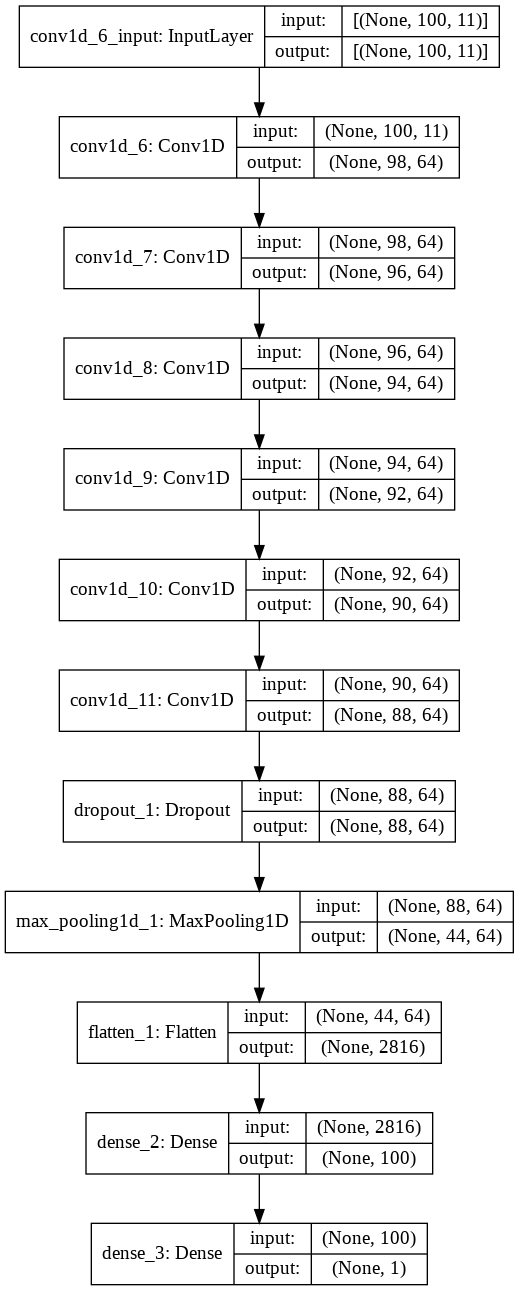

In [4]:
from keras.utils import plot_model

verbose, epochs, batch_size = 1, 30, 32
#n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
n_timesteps, n_features, n_outputs = 100, 11, 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='hard_sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.0001)


model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
verbose, epochs, batch_size = 1, 30, 32
#n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
n_timesteps, n_features, n_outputs = 100, 11, 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='hard_sigmoid'))

initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)


model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule), metrics=['accuracy'])
# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

Epoch 1/30
3/3 [==============================] - 1s 42ms/step - loss: 7.7234 - accuracy: 0.8992
Epoch 2/30
3/3 [==============================] - 0s 42ms/step - loss: 7.6956 - accuracy: 0.9437
Epoch 3/30
3/3 [==============================] - 0s 50ms/step - loss: 7.6096 - accuracy: 0.8977
Epoch 4/30
3/3 [==============================] - 0s 44ms/step - loss: 7.7095 - accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 0s 44ms/step - loss: 7.6586 - accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 0s 45ms/step - loss: 7.7268 - accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 0s 44ms/step - loss: 7.7320 - accuracy: 1.0000
Epoch 8/30
3/3 [==============================] - 0s 44ms/step - loss: 7.6815 - accuracy: 0.9820
Epoch 9/30
3/3 [==============================] - 0s 45ms/step - loss: 7.7208 - accuracy: 1.0000
Epoch 10/30
3/3 [==============================] - 0s 49ms/step - loss: 7.6799 - accuracy: 1.0000
Epoch 11/30
3/3 [============

[7.256823539733887, 1.0]

In [ ]:
verbose, epochs, batch_size = 1, 30, 32
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='hard_sigmoid'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)


model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule), metrics=['accuracy'])
# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

Epoch 1/30
3/3 [==============================] - 1s 45ms/step - loss: 7.6356 - accuracy: 0.9258
Epoch 2/30
3/3 [==============================] - 0s 48ms/step - loss: 7.6206 - accuracy: 0.9437
Epoch 3/30
3/3 [==============================] - 0s 42ms/step - loss: 7.7019 - accuracy: 0.9016
Epoch 4/30
3/3 [==============================] - 0s 44ms/step - loss: 7.8553 - accuracy: 0.8953
Epoch 5/30
3/3 [==============================] - 0s 45ms/step - loss: 7.6376 - accuracy: 0.8969
Epoch 6/30
3/3 [==============================] - 0s 44ms/step - loss: 7.7663 - accuracy: 0.9031
Epoch 7/30
3/3 [==============================] - 0s 45ms/step - loss: 7.8820 - accuracy: 0.9156
Epoch 8/30
3/3 [==============================] - 0s 48ms/step - loss: 7.7419 - accuracy: 0.7375
Epoch 9/30
3/3 [==============================] - 0s 47ms/step - loss: 7.7422 - accuracy: 0.6758
Epoch 10/30
3/3 [==============================] - 0s 43ms/step - loss: 7.7768 - accuracy: 0.6898
Epoch 11/30
3/3 [============

[7.414421081542969, 1.0]

In [ ]:
SEED = 123456
import os
import random as rn
import numpy as np
import tensorflow as tf
import tensorflow

tensorflow.random.set_seed(SEED)

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

In [ ]:
verbose, epochs, batch_size = 1, 30, 100
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='hard_sigmoid'))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)


model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule), metrics=['accuracy'])
# fit network
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

Epoch 1/30
1/1 [==============================] - 1s 862ms/step - loss: 7.6442 - accuracy: 0.3875
Epoch 2/30
1/1 [==============================] - 0s 15ms/step - loss: 7.7145 - accuracy: 0.4250
Epoch 3/30
1/1 [==============================] - 0s 16ms/step - loss: 7.6389 - accuracy: 0.1875
Epoch 4/30
1/1 [==============================] - 0s 19ms/step - loss: 7.7517 - accuracy: 0.4125
Epoch 5/30
1/1 [==============================] - 0s 16ms/step - loss: 7.6610 - accuracy: 0.3250
Epoch 6/30
1/1 [==============================] - 0s 15ms/step - loss: 7.6800 - accuracy: 0.4500
Epoch 7/30
1/1 [==============================] - 0s 16ms/step - loss: 7.7285 - accuracy: 0.5125
Epoch 8/30
1/1 [==============================] - 0s 15ms/step - loss: 7.7286 - accuracy: 0.5375
Epoch 9/30
1/1 [==============================] - 0s 15ms/step - loss: 7.6869 - accuracy: 0.7375
Epoch 10/30
1/1 [==============================] - 0s 17ms/step - loss: 7.7723 - accuracy: 0.7625
Epoch 11/30
1/1 [===========

[7.767104148864746, 1.0]